# EDA - РАД
Explorative Data Analysis - Разведывательный Анализ Данных

## Цель:  
Определить параметры будущей ML модели.
## Вопросы: 
1. Как условияя жизни влияют на людей в возрасте [15, 22] лет на успеваемость по математике? 
2. Кто находится в зоне риска? 

# Загрузка и Инициализация 
Загружаю необходимые библиотеки, датасет, с которым будем работать, определяю переменные "константы" и копирую разъяснение к столбцам датасета с описания к итоговому заданию.  

In [2247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

pd.set_option('display.max_columns', 40)

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

df = pd.read_csv('stud_math.csv')

In [2248]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Разъяснение аббревиатур

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

In [2249]:
# Диапазоны для количественных столбцов
BOUNDS = {
    'age': range(15,23),
    'm_edu': range(0,5),
    'f_edu': range(0,5),
    'travel_time': range(0,5),
    'study_time': range(0,5),
    'failures': range(0,4),
    'study_time_gr': range(-12,-2),
    'fam_rel': range(1,6),
    'free_time': range(1,6),
    'go_out': range(1,6),
    'health': range(1,6), 
    'score': range(0,101),
    'absences': range(0,10000000),
    
    'sex': ['F','M'],
    'school': ['GP','MS'],
    'address': ['U','R'],
    'fam_size': ['LE3','GT3'],
    'guardian': ['mother' , 'father', 'other'],
    'p_status': ['T','A'],
    
    'm_job': ['teacher','health','services','other','at_home'],
    'f_job': ['teacher','health','services','other','at_home'],
    
    'reason': ['home', 'reputation', 'course', 'other'],

    'school_sup': ['yes','no'],
    'fam_sup': ['yes','no'],
    'paid': ['yes','no'],
    'activities': ['yes','no'],
    'nursery': ['yes','no'],
    'higher': ['yes','no'],
    'internet': ['yes','no'],
    'romantic': ['yes','no'],   
}

# Подготовка

## Переименование столбцов

In [2250]:
df.rename(columns={'Pstatus': 'p_status', 'traveltime':'travel_time','studytime':'study_time','famrel':'fam_rel','freetime':'free_time','goout':'go_out', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job','famsize':'fam_size', 'studytime, granular': 'study_time_gr', 'famsup':'fam_sup','schoolsup':'school_sup'}, inplace=True)
df

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,study_time_gr,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Кастомные функции

In [2251]:
# Находит None/NaN значения в столбцах и считает их кол-во
def find_empty(col):
    
    return df[df[col].isnull()==True][col].shape[0]



# Проверяет находятся ли значения столбцов в своем диапазоне
def check_bounds(cols, kind):
    if (kind == 'numeric'):
        out_of_bounds = 'Все значения количественных столбцов в пределах своих диапазонов.'
                
    elif kind == 'categorical':
        out_of_bounds = 'Все значения номинативных столбцов в пределах своих диапазонов.'
        
    for col in cols:
        df[col] = df[col].apply(lambda x: x if x in BOUNDS[col] else None) 

        try:
            # hole - "дырка" или значение None/NaN 
            num_of_holes =find_empty(col) 
        except:
            num_of_holes = 0 

        # сравнивает увеличилось ли кол-во неизвестных значений    
        if df[col].isnull().sum() != num_of_holes: 
            out_of_bounds = 'Есть ошибки.'
            print('В столбце ' + col + ' значения вне диапазона.')
    
    return out_of_bounds



# заменяет значения None/NaN для описанных случаев (m_edu,f_edu)
def fix_holes(kind):
    if (kind in ['education']):
        col_to_fix = ['teacher', 'health']
        gender = [0,1]
        job = ['m_job', 'f_job']
        edu = ['m_edu', 'f_edu']
        
        for case in col_to_fix:
            for g in gender: 
                condition = (df[job[g]] == case) & (df[edu[g]].isnull())
                row = list(df[condition][[job[g], edu[g]]].index)
                column_num = df.columns.get_loc(edu[g])
            
                for r in row: 
                    df.iloc[r,column_num] = medians.xs('F').loc[case][0]
      
    
            
# функция рисования  боксплотов дляя категориальных признаков
def draw_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 5))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=30)
    plt.show()
    print(' ')
    
    
    
# тест Стюдента
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'].dropna(),
                          df.loc[df.loc[:, column] == comb[1], 'score'].dropna()).pvalue

        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

## Что у нас есть? Поверхностный разбор столбцов : количественные и номинативные признаки
Выгружаю по отдельности разные типы столбцов, чтобы провести две отдельных подготовки для каждого из 2-х типов информации: числовой и строковой. 

Некоторые из количественных столбцов можно также выделить в подкатегорию. Так например, *Medu, Fedu, traveltime,	studytime	failures, studytime, granular, 	famrel,	freetime,	goout,	health* - все являются по сути **измерительными шкалами**. 


In [2252]:
print('Количество количественных признаков: ' + str(df.select_dtypes('number').shape[1]))
numeric_cols = df.select_dtypes('number').columns

df.select_dtypes('number').head(10)

Количество количественных признаков: 13


,age,m_edu,f_edu,travel_time,study_time,failures,study_time_gr,fam_rel,free_time,go_out,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
5,16,4.0,3.0,1.0,2.0,0.0,-6.0,5.0,4.0,2.0,5.0,10.0,75.0
6,16,2.0,2.0,1.0,2.0,0.0,-6.0,4.0,4.0,4.0,3.0,0.0,55.0
7,17,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,1.0,4.0,1.0,6.0,30.0
8,15,3.0,2.0,1.0,2.0,0.0,-6.0,NaN,2.0,2.0,1.0,0.0,95.0
9,15,3.0,4.0,1.0,2.0,0.0,-6.0,5.0,5.0,1.0,5.0,0.0,75.0


Из строковых столбцов можно также выделить **бинарную подкатегорию**, куда могут входить : *school,	sex,	address,	famsize,	Pstatus,	schoolsup,	famsup,	paid,	activities,	nursery,	higher,	internet,	romantic*.

In [2253]:
print('Количество номинативных признаков: ' + str(df.select_dtypes('object').shape[1]))
nominative_cols = df.select_dtypes('object').columns

df.select_dtypes('object').head(10)

Количество номинативных признаков: 17


,school,sex,address,fam_size,p_status,m_job,f_job,reason,guardian,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,NaN,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no
9,GP,M,U,NaN,NaN,other,other,home,mother,no,yes,yes,yes,yes,yes,yes,no


### Проверка диапазонов количественных признаков
Есть ли значения вне границ? На первый взгляд нет, нету, кроме как значений NaN в некоторых столбцах, а также несколько слишком больших значений в absences, где я, как поняла, нет строгой верхней границы ограничения, но в жизни наверное бы таких учеников давно бы исключили. Функция кастомная функция **check_bounds**, сравнивая с условной константой **BOUNDS**, проверяет правильность диапазонов значений во всех столбцах.

In [2254]:
check_bounds(list(numeric_cols),'numeric')

'Все значения количественных столбцов в пределах своих диапазонов.'

In [2255]:
check_bounds(list(nominative_cols),'categorical')

'Все значения номинативных столбцов в пределах своих диапазонов.'

В гистограмме видно то, что есть странные значения в этом столбце, на которые надо будет обратить внимание. (почему-то не всегда отображается)

<AxesSubplot:>

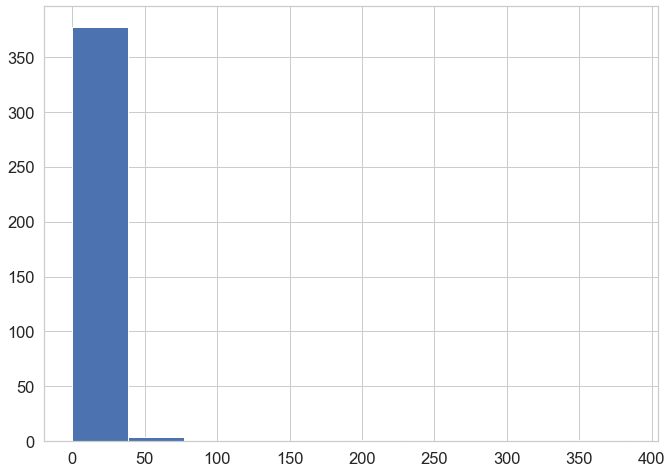

In [2256]:
df['absences'].hist()

### Поиск неизвестных значений

В каких столбцах имеются None/NaN и пустые строки? В общем получается, что 27 столбцов неполные по информации, есть пропуски, и только 3 столбца полностью заполнены и не требуют доработок: school, sex, age.  

In [2257]:
(df.isna().sum()==0).head(7)

school       True
sex          True
age          True
address     False
fam_size    False
p_status    False
m_edu       False
dtype: bool

In [2258]:
empty_cols = pd.DataFrame(df.isna().sum())
empty_cols = empty_cols[empty_cols.values>0]

display(empty_cols)
print("Кол-во столбцов с неизвестными данными: " + str(len(empty_cols)))

,0
address,17
fam_size,27
p_status,45
m_edu,3
f_edu,25
m_job,19
f_job,36
reason,17
guardian,31
travel_time,28


Кол-во столбцов с неизвестными данными: 27


In [2259]:
df[empty_cols.index].head(5)

,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,study_time_gr,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Детальный разбор столбцов по одному

### Столбцы 'study_time_gr' и 'study_time'

Из графика и таблицы ниже видно то, что столбцы *'study_time_gr' = 'study_time' * (-3)* и соответсвенно полностью корреллируют между собой. Я думаю, что **'study_time_gr'** представлен в датасете специально, чтобы в дальнейшем на графиках он помог нам увидеть корреляцию, которую со **study_time** возможно не сразу разглядишь? Тем не менее, использовать их обоих в будущей ML модели одновременно нет смысла, только один из них должен будет войти в главные параметры модели, если, конечно же, они будут коррелировать со score. Пока я удалю один из них из датасета. 

Как уже было найдено функцией find_empty(), имеется 7 неизвестных значений. На данном этапе заполнить эти значения точно как не знаю. Медиана и среднее значение совпадают - равны 2, то есть в среднем ученики посвящают около 2-5 часов на учебу вне школы.Если заполнять, то наверное этим значением. 

In [2260]:
df.loc[:,['study_time','study_time_gr']]

,study_time,study_time_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


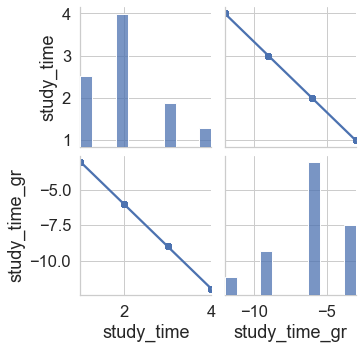

In [2261]:
sns.pairplot(df[['study_time','study_time_gr']], kind = 'reg')

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

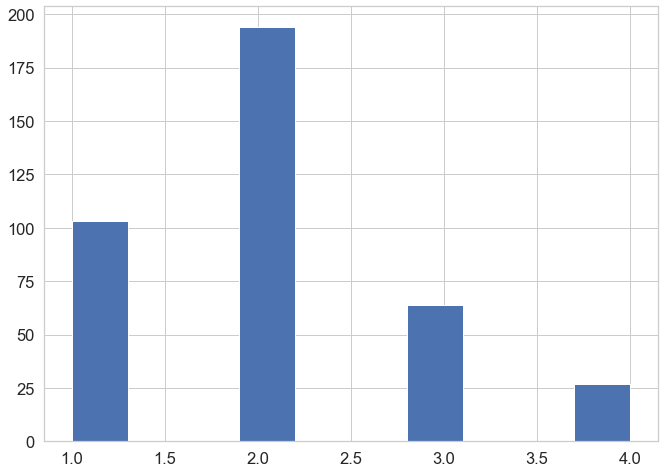

In [2262]:
df.study_time.hist()
df.study_time.describe()

In [2263]:
df.drop(['study_time_gr'], inplace = True, axis = 1)

### Столбцы m_edu, f_edu, m_job, f_job

In [2264]:
print(find_empty('f_edu'))
print(find_empty('m_edu'))

25
3


Некоторые неизвестные значения **m_edu** и **f_edu** возможно предположить из **m_job** и **f_job**. Предположенные данные могут быть правильным или неправильными и соответсвенно позитивно или неготивно повлиять на выводы, но, так как датасет маленький, думаю, что убратие неизвестных значений без замен будет стоить дороже и точно также может негативно повлиять на выводы из-за уменьшения кол-ва информации.  

Рассматриваю эти столбцы месте, так как в жизни в определенные сферы без нужного образования трудно пройти как для мужчин, так и для женщин. Например, образование или медицина. 

Из графика ниже мы видим то, что большинство родителей, особенно мамы, детей работают в сферах **other** и **services**, что касается образования, то здесь сложно сказать, так как нет какого-то доминантного значения.  

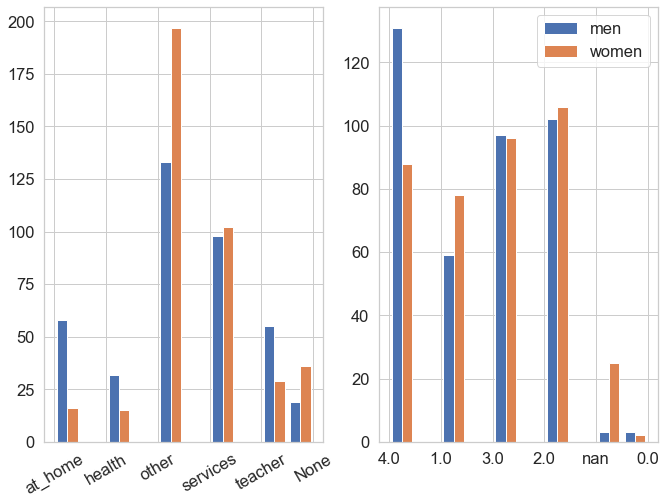

In [2265]:
plt.subplot(1, 2, 1)
plt.hist([df['m_job'].astype(str), df['f_job'].astype(str)], label=['men','women'])
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
plt.hist([df['m_edu'].astype(str), df['f_edu'].astype(str)],label=['men','women'])

plt.legend()

In [2266]:
# для удобства создаю новый датасет
jobs_m = list(df.m_job)
jobs_w = list(df.f_job)
jobs = jobs_m + jobs_w

edu_m = list(df.m_edu)
edu_w = list(df.f_edu)
edu = edu_m + edu_w

gender = ['M'] * len(jobs_m) + ['F'] * len(jobs_w)

data = {'gender': gender, 'jobs': jobs, 'education': edu} 

small_df = pd.DataFrame(data)


Создание новго датасета с нужной информацией и удобной категоризацией её позволяет составить такую вот по-моему наглядную гистограмму. По ней мы можем посмотреть в каких профессиях/сферах какое образование у мужчин и женщин, а также разницу между ними. Как видно, особой разницы по половому признаку нет, особенно в преподавательских профессиях. Соответсвенно рассматиривать столбцы **f_edu**, **m_edu** стоит вместе.  

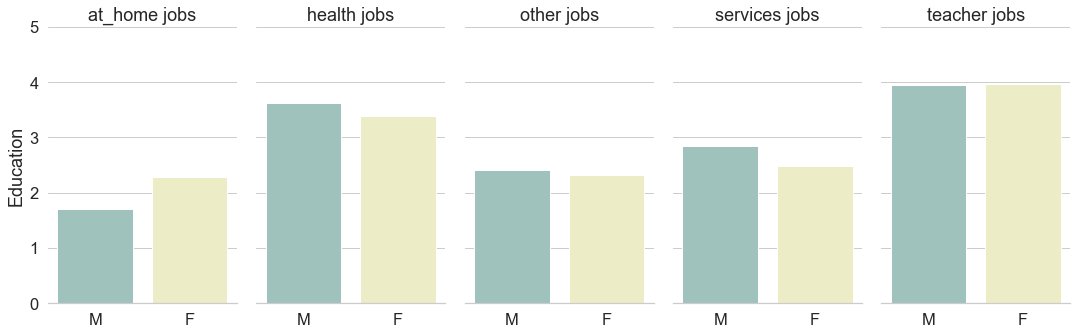

In [2267]:
g = sns.catplot(x='gender', y='education', col = 'jobs',
                data=small_df, saturation=.5,
                kind="bar", ci=None, aspect=.6,palette="Set3")
(g.set_axis_labels("", "Education")
  .set_xticklabels(["M", "F"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 5))
  .despine(left=True))  

**Box plot** ниже позволяет еще более лучше понять ситуацию с каждой сферой деятельности и соответсвенной разницой между папами и мамами по отношению к образованию.  Здесь мне кажется более наглядно видно то, что определенные сферы деятельности требуют определенного образования. То есть рассмотрение столбцов **m_edu**, **f_edu**, **m_job**, **f_job** вместе правильно подтвержает не только здравый смысл, но и дата. 

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; y

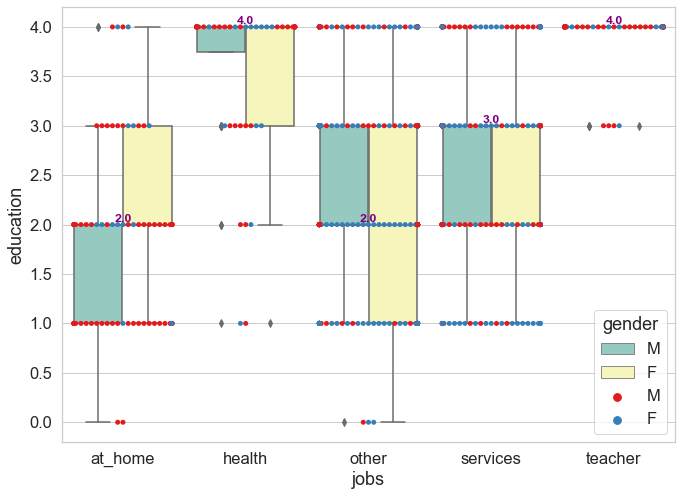

In [2268]:
box_plot = sns.swarmplot(x="jobs", y="education",hue="gender", data=small_df,palette="Set1")
box_plot = sns.boxplot(x="jobs", y="education",hue="gender", data=small_df,palette="Set3")

medians = small_df.groupby(['jobs'])['education'].median()
vertical_offset = small_df['education'].median() * 0.01  # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='purple',weight='semibold')

Дополнительно выписываем медианые значения для каждой из сфер деятельности. Как видно и там, и там они одинаковые. 

In [2269]:
medians = small_df.groupby([gender,jobs]).median()
medians

education
F at_home         2.0
  health          4.0
  other           2.0
  services        3.0
  teacher         4.0
M at_home         2.0
  health          4.0
  other           2.0
  services        3.0
  teacher         4.0

Я думаю то, что мы можем смело заменять **None** значения в **'teacher' и 'health'**, так как графики выше нам показывают то, что как для мужчин, так и для женщин тенденция одинаковая. В сфере предодавательской обязательно высшее образование, в сфере здоровья также в основном нужно высшее Соответсвенно мамы и папы, которые работают по таких профессиям и имеют в основном соответсвующее образование. Это потверджается как датой, так и здравым смыслом. 

Функция **fix_holes** заменяет **None** значения на медиану в данной ситуации. В результате получилось уменьшилось кол-во неизвестных значений на 5 штук.  

In [2270]:
fix_holes('education')
print(find_empty('f_edu'))
print(find_empty('m_edu'))

20
3


В сферах **at_home, services и other** выделить какое-то одно доминируещее число сложно, поэтому заменить неизвестные значения на данный момент не получится.

In [2271]:
small_df.groupby(['jobs','education']).count()

gender
jobs     education        
at_home  0.0             2
         1.0            28
         2.0            27
         3.0            11
         4.0             4
health   1.0             2
         2.0             3
         3.0             8
         4.0            32
other    0.0             3
         1.0            74
         2.0           103
         3.0            88
         4.0            52
services 1.0            24
         2.0            57
         3.0            69
         4.0            41
teacher  3.0             4
         4.0            77

Заполнить **m_job и f_job**  затруднительно, так как вариантов для замены слишком много, как видно из графика ниже. Неизвестных значений в сумме на оба пола много - 55. Знание сферы деятельности помогло рассчитать примерный уровень образования в некоторых сферах, но наоборот не представляется возможным. Так, например, мама может быть домохозяйкой и при этом иметь высшее образование. 

(array([[131.,   0.,  59.,   0.,  97.,   0., 102.,   0.,   3.,   3.],
        [ 93.,   0.,  78.,   0.,  96.,   0., 106.,   0.,  20.,   2.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

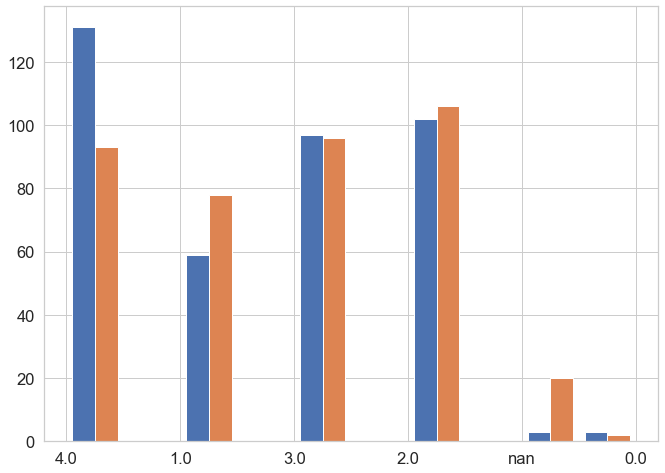

In [2272]:
plt.hist([df['m_edu'].astype(str), df['f_edu'].astype(str)],label=['men','women'])


### Отношение с семьей fam_rel 

In [2273]:
find_empty('fam_rel')

28

Имеется 28 строк, в которых значения неизвестны. Заполнить пропуски на данный момент сложно, так как понятно то, что у большинства учеников хорошее отношение с родителями, однако выбрать какую-то одну оценку, варирующуюся между "номально" и "очень хорошо" трудно, поэтому пока заполнять пропуски не буду. Возможно надо найти какой-нибудь другой признак, корреллирующий с этим, чтобы , более точно преположить None знаечния. Например, возраст. 

,fam_rel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


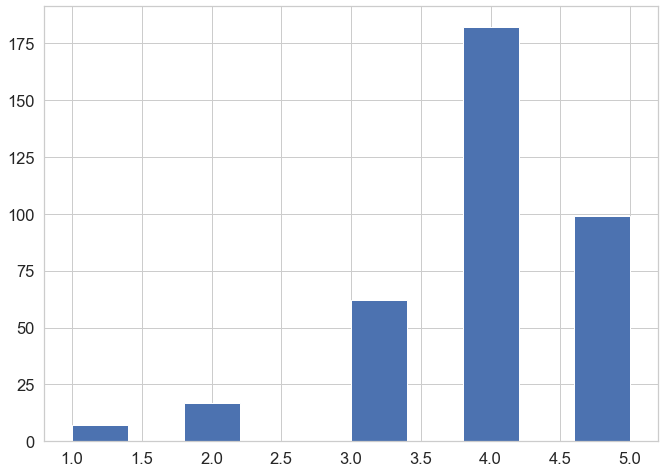

In [2274]:
df.fam_rel.hist()
pd.DataFrame(df.fam_rel.value_counts())

#### Отношение **age** к **fam_rel**

In [2275]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Графики ниже показывает то, что ученики в возрасте от 20 лет включительно имеют очень хорошие отношения с родителями, но стоит отметить, что в датасете их всего 5, в то время, как если оценка от 1 до 2, то вероятнее всего, что это ученик возраста 16-17 лет. Поэтому данная информация особо ничего нам не дает, так как большинство учеников как раз-таки такого возраста. Для интереса я также сравниваю со **score**, но особой зависимости пока на данный момент я не вижу.

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; yo

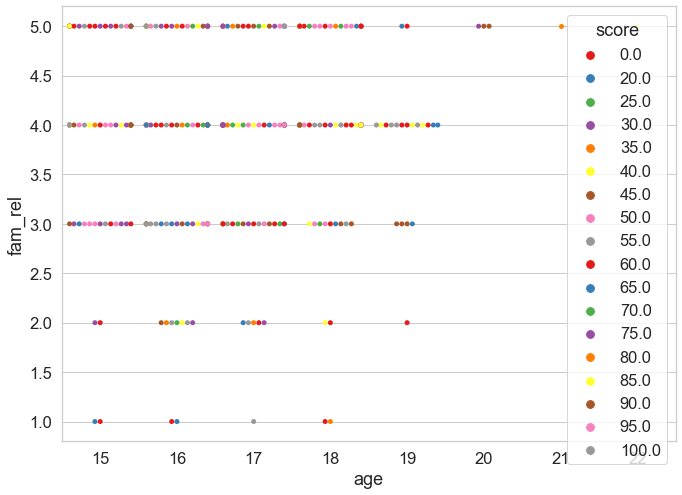

In [2276]:
box_plot = sns.swarmplot(x='age', y='fam_rel',hue='score', data=df,palette="Set1")

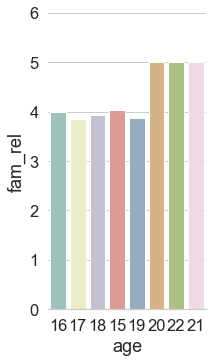

In [2277]:
g = sns.catplot(x='age', y='fam_rel',
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6,palette="Set3")
(g.set_axis_labels("age", "fam_rel")
  .set_xticklabels(list(df.age.value_counts().index))
  .set(ylim=(0, 6))
  .despine(left=True))  

In [2278]:
df[['age','fam_rel']].groupby('fam_rel').agg(['mean','median'])

age       
              mean median
fam_rel                  
1.0      16.428571     16
2.0      16.588235     16
3.0      16.532258     16
4.0      16.730769     17
5.0      16.767677     17

## Столбец аge

В прошлой секции я уже писала об age. В основном ученики от 15 до 18 лет (гистограмма чуть-чуть странно выглядит почему-то...). Один из нескольких столбцов, где неизвестных значений нет.

0

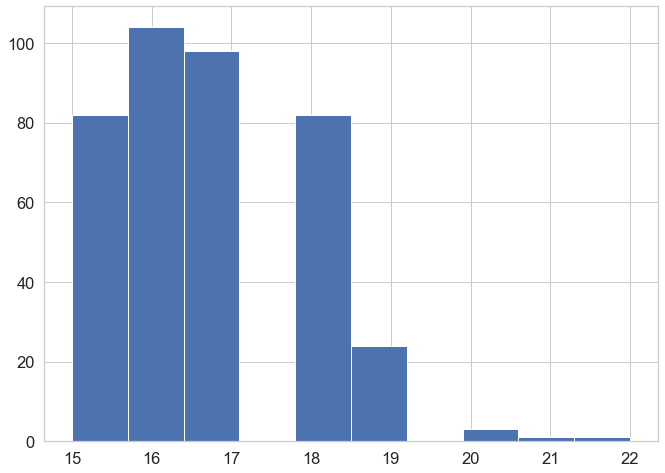

In [2279]:
df.age.hist()
find_empty('age')

In [2280]:
df.groupby(['age']).score.agg(['count','mean', 'max', 'min', 'median'])

,count,mean,max,min,median
age,,,,,
15,82,56.280488,95.0,0.0,55.0
16,103,55.194175,100.0,0.0,55.0
17,98,51.377551,90.0,0.0,55.0
18,80,48.312500,95.0,0.0,50.0
19,21,40.238095,65.0,0.0,45.0
20,3,70.000000,90.0,45.0,75.0
21,1,35.000000,35.0,35.0,35.0
22,1,40.000000,40.0,40.0,40.0


### Столбец guardian 

В большинстве опекуном детей является мама. В этом солбце есть 31 неизвестных значения. Возможно заполнить их соответсвенно доминируещим вариантом "mother", однако из-за того, что пропусков аж 31, и ранее на одном из swarmplot в секции fam_rel я для интереса сравнила score с возрастом и отношением к семье, и не увидела особой зависимости, думаю, что guardian признак сам по себе не является важным для ML модели. На данный момент я оставлю с неизвестными значениями столбец, но, если в дальнейшем покажется его важность, то еще раз вернусь к рассмотрению замены как и на что. 

mother    250
father     86
other      28
Name: guardian, dtype: int64

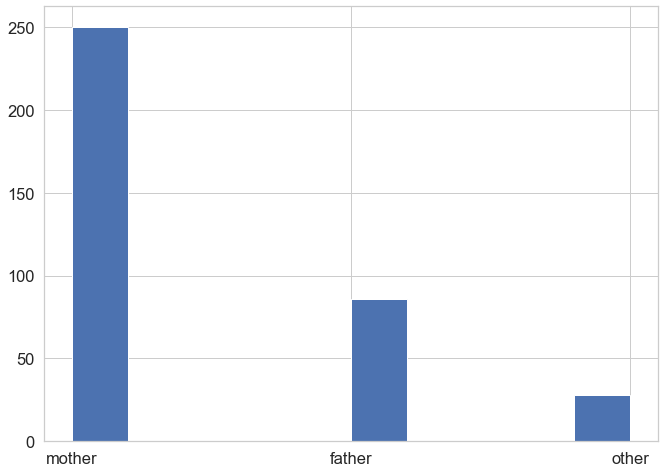

In [2281]:
df.guardian.hist()
df.guardian.value_counts()

In [2282]:
find_empty('guardian')

31

### Столбцы travel_time, study_time, go_out, free_time
Во всех трех столбцах есть неизвестные величнины (53 в общем). В **travel_time** опять же можно было бы заменить доминирующим значением, однако пропуск слишком много (28), и поэтому кажется, что они требуют более глубокого анализа. В **study_time**, **free_time**, **go_out** нет одного доминирующего варианта, поэтому что-то одно выбрать на замену трудно. На данный момент мне кажется, что эти столбцы можно оставить так и опять же вернуться к ним, если при детальном анализе дальше вяснится то, что они важны. 

<AxesSubplot:title={'center':'free_time'}>

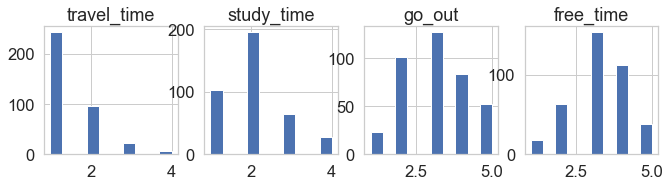

In [2283]:
plt.subplot(3,4,1)
plt.title('travel_time')
df.travel_time.hist()
plt.subplot(3,4,2)
plt.title('study_time')
df.study_time.hist()
plt.subplot(3,4,3)
plt.title('go_out')
df.go_out.hist()
plt.subplot(3,4,4)
plt.title('free_time')
df.free_time.hist()

In [2284]:
for time in ['travel_time','study_time','go_out','free_time']:
    print(find_empty(time))

28
7
8
11


## Столбец reason, health
Присутсвуют 17 и 15 пропусков в столбцах **reason** и **health** соответсвенно. Доминирующего значения для каждого из столбцов нет, поэтому замена None на данном этапе делать не стоит. 


<AxesSubplot:title={'center':'health'}>

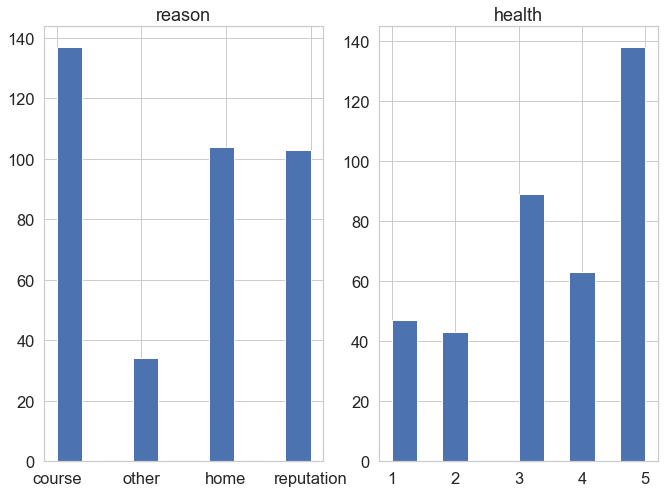

In [2285]:
plt.subplot(1,2,1)
plt.title('reason')
df.reason.hist()


plt.subplot(1,2,2)
plt.title('health')
df.health.hist()

In [2286]:
print(find_empty('reason'))
find_empty('health')

17


15

## Столбец Abscences 
Как уже было раньше замечено у **abscences** есть некоторые значения, которые кажутся выбросами, а именно 385 и 212. Здесь появляется вопрос: ***с каким временным промежутком мы работаем?*** Если это один учебный год, то тогда у abscences должна быть верхняяя граница, например 365 дней, если же дата была собрана в течении какого-то другого периода времени, например дольше, то это возможно позволительное значение. Также возможно то, что эти два студента могут быть студенты по обмену, что тогда объясняет почему у ученика с максимальным кол-во пропусков, высокие оценки.

In [2287]:
find_empty('absences')

12

In [2288]:
df[df.absences>100]

/usr/local/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,None,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

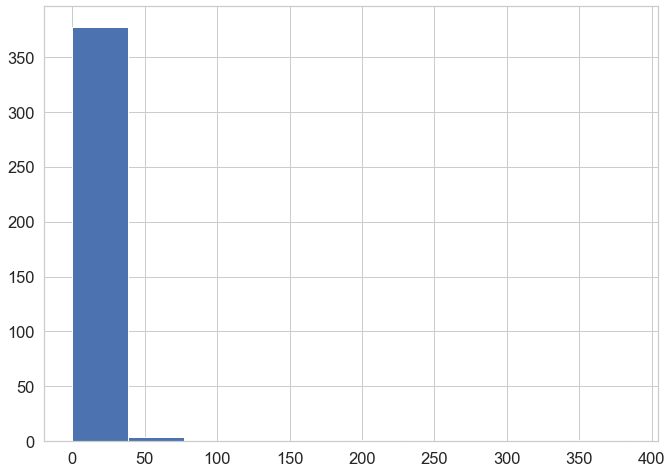

In [2289]:
df.absences.hist()
df.absences.describe()
# groups = df.absences.groupby(pd.cut(df.absences, bins))
# pd.DataFrame(groups.count())

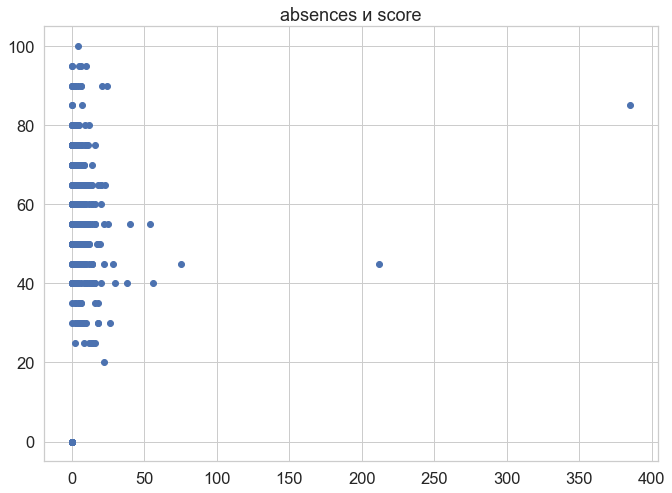

In [2290]:
plt.title('absences и score')
plt.scatter(df['absences'], df['score'])

Пропуски вероятней всего могут корреллировать со здоровьем, прогулами, может быть даже путем до школы. Но из графика ниже такой сильной зависимости я не вижу.

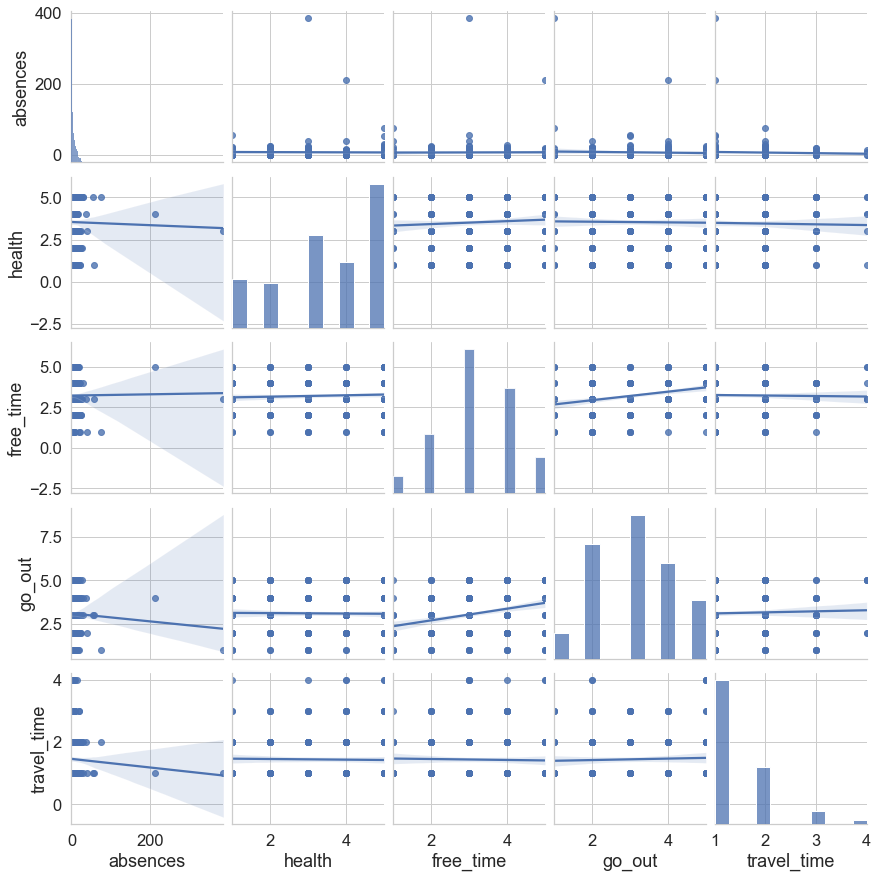

In [2291]:
sns.pairplot(df[['absences','health','free_time','go_out','travel_time']],kind='reg')

### Столбец score

In [2292]:
find_empty('score')

6

In [2293]:
df[df.score==0].shape

(37, 29)

В столбце **score** всего лишь 6 неизвестных значений. Из гистограммы и статистического описания видно то, что есть ученики, которые получили 0 по экзамену, что вызывает сомнения... Здравый смысл подсказывает, что это очень наврятли, особенно по шкале 0-100. Хотя они могли не явиться на экзамен, что тогда объясняет такой бал. Мне кажется, что ни сценарий неявки, ни сценарий ошибки записи данных исключать не надо. Если считать 0 за неизвестное значение, то тогда их 37. 

График показывает то, что основая масса оценок попадает под нормальное распределение, что логично, но разброс(дисперсияя) значений получается достаточно большим/ой. 

In [2294]:
score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

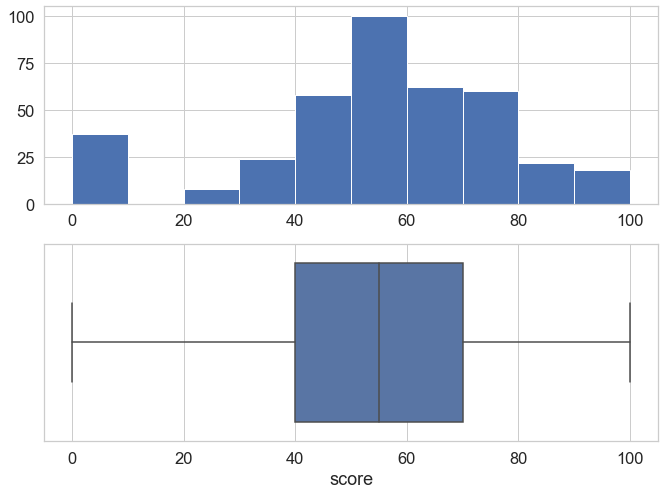

In [2295]:
plt.subplot(2,1,1)
df.score.hist()
plt.subplot(2,1,2)
sns.boxplot(df.score)

Проверим на выбросы.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


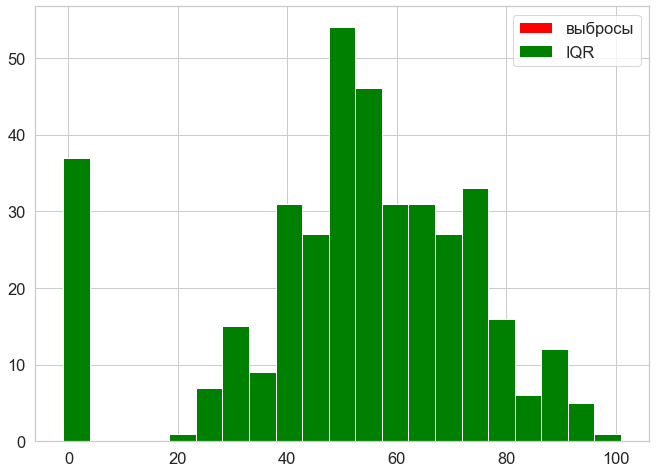

In [2296]:
score = df.score
median = score.median()
IQR = score.quantile(0.75) - df.absences.quantile(0.25)
perc25 = score.quantile(0.25)
perc75 = score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


score.loc[score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'red',
                                  label = 'выбросы')

score.loc[score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        color = 'green',
                                                                        label = 'IQR')

plt.legend();

**При рассмотрении по адресу (в городе, за городом), можно увидеть то, что оценки попадают под нормальное распределение только для учеников города, в то время как какого-то конкретного распределения для оценок учащиеся загородом нельзя назвать. Соответсвенно думаю то, что ML модели будет легче работать с информацией учеников с города**

<AxesSubplot:>

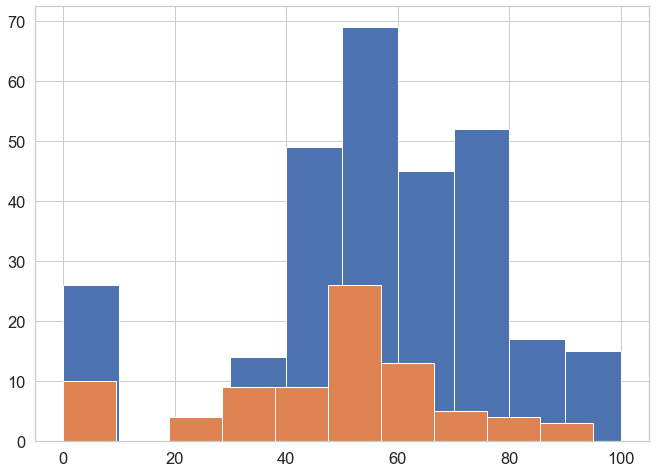

In [2297]:
df[df['address'] == 'U']['score'].hist()
df[df['address'] == 'R']['score'].hist()

### Категориальные (номинативные) столбцы

Проверка их диапазонов была сделана еще в самом начале. Заменить неизвестные значения на данный момент невозможно. Более половины из них имееют 20 неизвестных значений и больше. 

In [2298]:
df[nominative_cols].describe()

,school,sex,address,fam_size,p_status,m_job,f_job,reason,guardian,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [2299]:
print('Кол-во None значений:\n')
holes = {}
for col in nominative_cols:
    holes[col] = find_empty(col)
holes = pd.DataFrame(data = list(holes.values()), index = list(holes.keys()), columns = ['count'])
holes.sort_values(by = 'count', ascending = False)

Кол-во None значений:



,count
p_status,45
paid,40
fam_sup,39
f_job,36
internet,34
guardian,31
romantic,31
fam_size,27
higher,20
m_job,19


Почти все бинарные, как мы выяснили раньше, имееют по 2 варианта значений, кроме **m_job, f_job, reason, guardian**

In [2300]:
df[nominative_cols].nunique()

school        2
sex           2
address       2
fam_size      2
p_status      2
m_job         5
f_job         5
reason        4
guardian      3
school_sup    2
fam_sup       2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

**Визуально** из box plot'ов ниже по существенной плотности распределения **можно выделить** несколько признаков/столбцов:
1. higher - желание получить высшее образование
2. p_status - вместе или нет родители
3. school_sup - поддержка школы
4. internet - наличие интернета
5. nursery - был ли в дет. саду или нет
6. fam_size - размер семьи
7. failures - 

Также c умеренными различиями:
1. f_job 
2. school 
3. address 
4. study_time
5. health

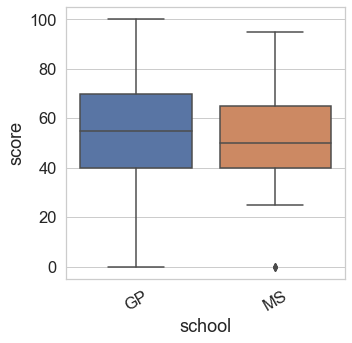

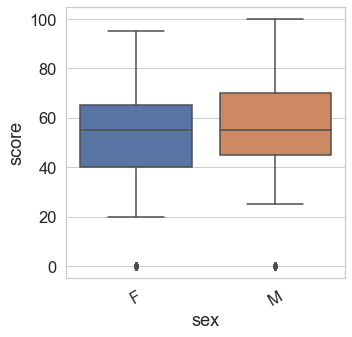

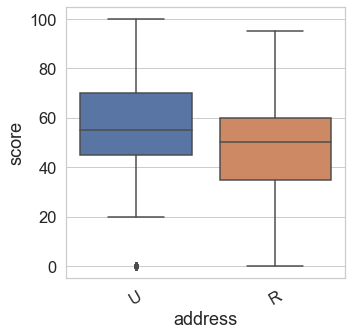

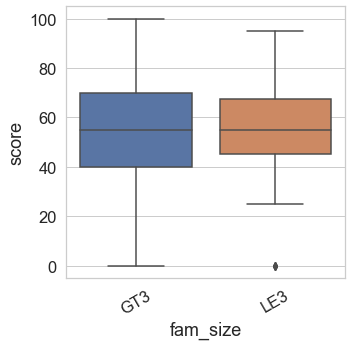

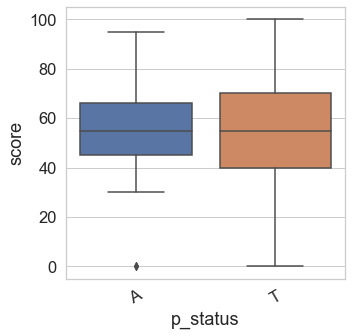

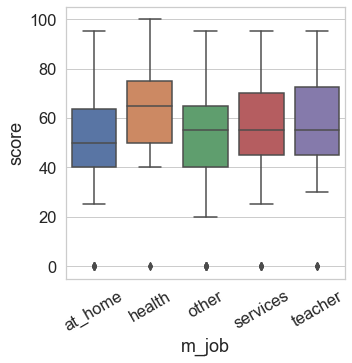

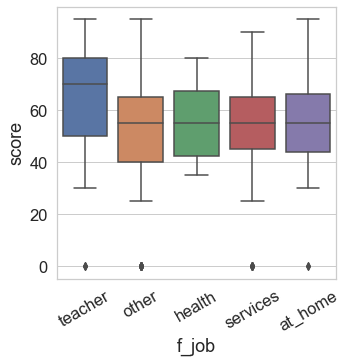

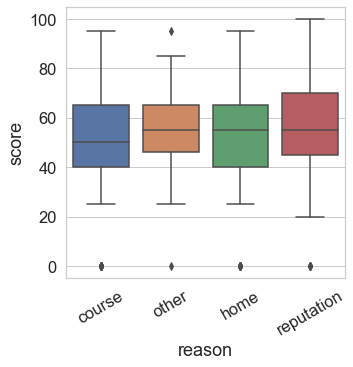

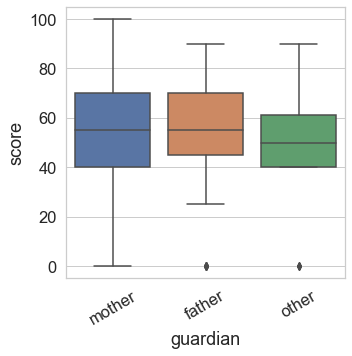

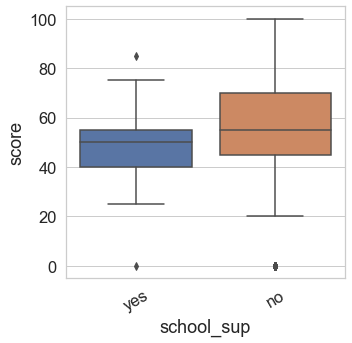

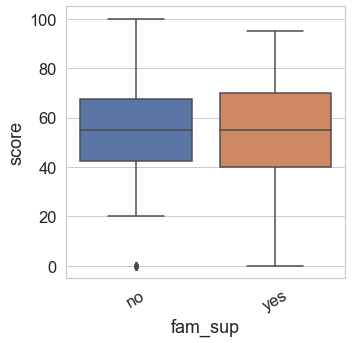

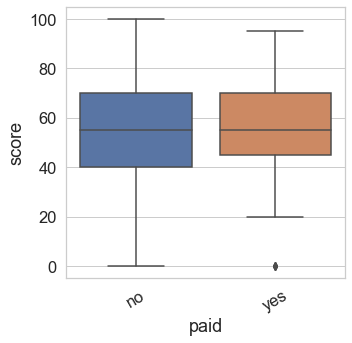

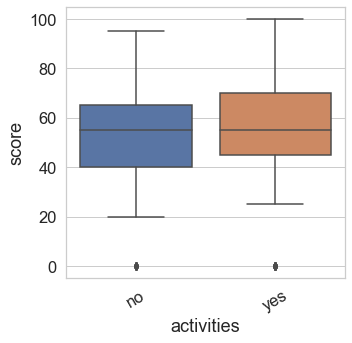

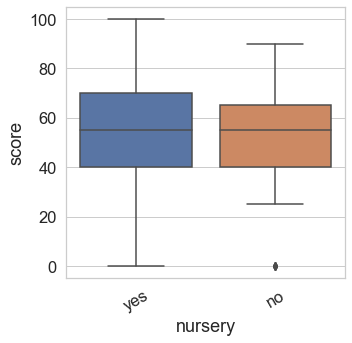

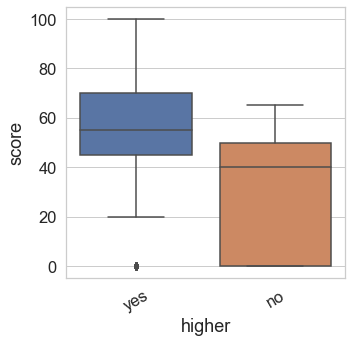

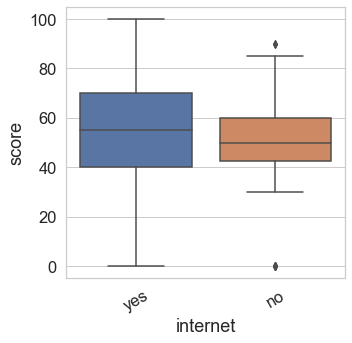

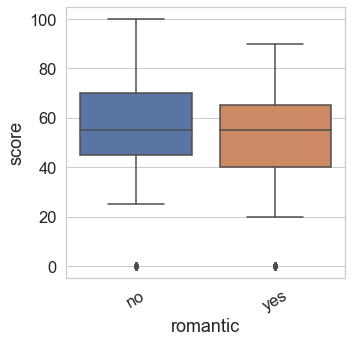

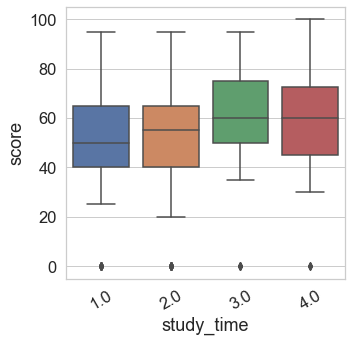

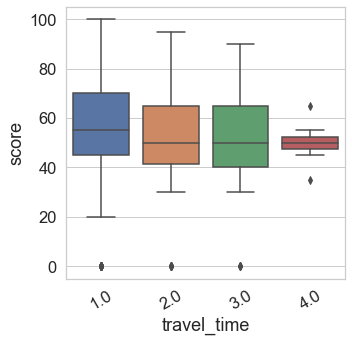

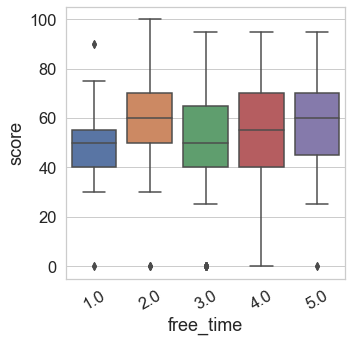

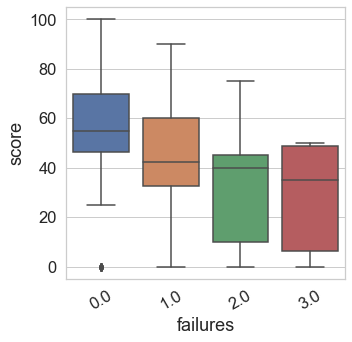

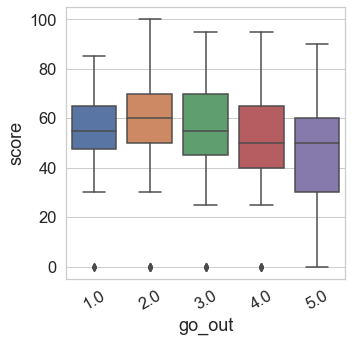

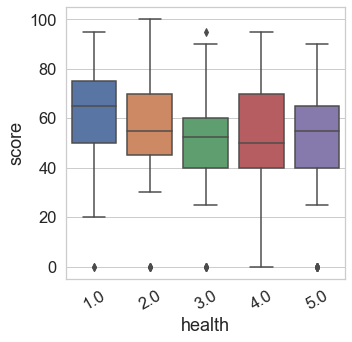

In [2301]:
# некоторые из них у меня вначале записаны как количественные, так как оцениваются по шкале от 1 до 4
categorical = list(nominative_cols) + ['study_time','travel_time','free_time','failures','go_out','health']

for col in categorical:
    draw_boxplot(col)

## Тест Стьюдента
С помощью теста Стьюдента проверяем, есть ли статистическая равенство или разница в распределении оценок по номинативным категориальным признакам. Он показывает то, что серьезно отличаются 6 параметров: **address, m_job, higher, romantic, failures, go_out**. Получается, что  эти 6 признака остаются для ML модели, которые вероятней всего вляют на **score**. А визуально я лично распознала только три. 

In [2302]:
for col in categorical:
    get_stat_dif(col)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки m_job
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки go_out


## Корреляции некатегориальных числовых 
Признаки **age** и **absences** **НЕ** корреллируют между собой, **age** и **score** показывают негативную слабую корреляцию, что намекает на то, что ученики старше возможно имеют хуже оценки.

In [2303]:
df[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.093592,-0.155726
absences,0.093592,1.000000,0.065283
score,-0.155726,0.065283,1.000000


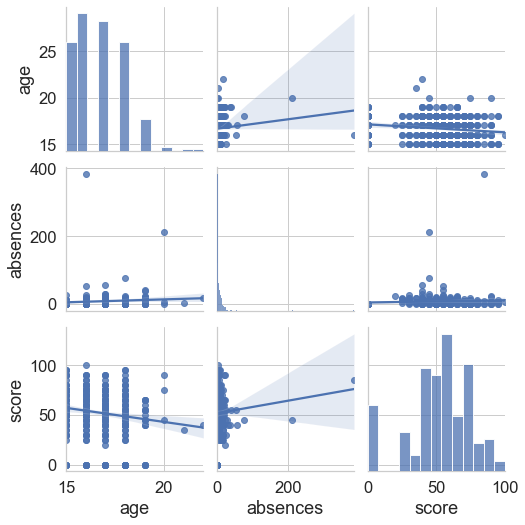

In [2304]:
sns.pairplot(df[['age', 'absences', 'score']], kind = 'reg')

In [2305]:
df[df.age>19][['age','score']].sort_values(by='score')

,age,score
392,21,35.0
247,22,40.0
390,20,45.0
376,20,75.0
306,20,90.0


# Подготовка параметров для ML модели

**ml** - новый датасет, содержащий только нужные для расчета **score признаки**, соответвенно анализу, проделанному выше. 

In [2337]:
ml = df.loc[:, ['score', 'age', 'absences', 'address', 'm_job', 'higher', 'romantic', 'failures', 'go_out']]

In [2338]:
ml.head()

,score,age,absences,address,m_job,higher,romantic,failures,go_out
0,30.0,18,6.0,U,at_home,yes,no,0.0,4.0
1,30.0,17,4.0,U,at_home,yes,no,0.0,3.0
2,50.0,15,10.0,U,at_home,yes,None,3.0,2.0
3,75.0,15,2.0,U,health,yes,yes,0.0,2.0
4,50.0,16,4.0,U,other,yes,no,0.0,2.0


             score       age  absences  failures    go_out
score     1.000000 -0.155726  0.065283 -0.344338 -0.129685
age      -0.155726  1.000000  0.093592  0.228047  0.135107
absences  0.065283  0.093592  1.000000  0.057391 -0.048738
failures -0.344338  0.228047  0.057391  1.000000  0.120914
go_out   -0.129685  0.135107 -0.048738  0.120914  1.000000


<AxesSubplot:>

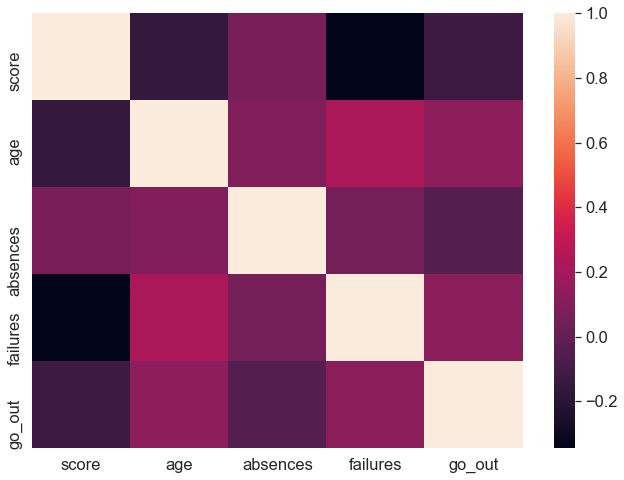

In [2339]:
print(ml.corr())
sns.heatmap(ml.corr())

Дублирующих друг друга значений, сильно корреллирующих между собой нет, кроме как светлых пятен в диагонли, означающие полную коррелляцию признаков с самими собой.

Преобразуем номинативные столбцы в числовые, чтобы их можно было бы передовать математическим функциям или использовать в различных графикам. 

In [2340]:
mappings = {
    'address' : {'U': 1 , 'R': 0},
    'higher'  : {'yes':1, 'no': 0},
    'romantic': {'yes':1, 'no': 0},
    'm_job'   : {
                'teacher' : 0,
                'health'  : 1,
                'services': 2,
                'at_home' : 3, 
                'other'   : 4
                }
     }

def digitize(data, cols):
    for col in cols:
        data[col] = data[col].map(mappings[col])
    return data

cols_to_digitilize = ['address', 'm_job', 'higher', 'romantic']
ml = digitize(ml, cols_to_digitilize)


In [2344]:
Еще раз проверим корреляцию - дублирующих значений нет. 

SyntaxError: invalid syntax (<ipython-input-2344-997e1063d501>, line 1)

,score
score,1.000000
higher,0.185563
address,0.120067
absences,0.065283
m_job,-0.137513
romantic,-0.141320
age,-0.155726
failures,-0.344338


<AxesSubplot:>

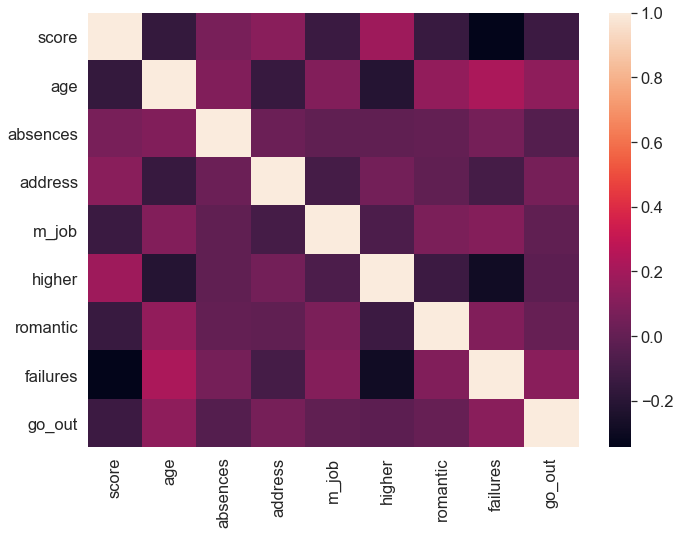

In [2374]:
display(pd.DataFrame(ml.corr().iloc[0,:-1]).sort_values(by='score',ascending = False))
sns.heatmap(ml.corr())


# Выводы

Я провела разведовательный анализ данных, основываясь на построении графиков, сравнивании информации и статистическом анализе, а также опираясь на здравый смысл. 

1 Датасэт относительно маленький, но в нем присутсвует много неизвестных значений: из 29 столбцов есть только 3, которые полностью заполнены. Удаление целых рядов, где есть неизвестные значения, было бы нецелесообразно, так как мы бы потеряли больше информации, чем получили бы более аккуратные вычисления в связи с маленьким размером датасета. 

2 Замена неизвестных значений почти всегда была затруднительна: доминирующие значения на замену было трудно определить. Тем не менее, определив взаимосвязь как логическую, так и статистическую между "m_job","f_job", "m_edu", "f_edu", для некоторых сфер деятельности получилось произвести замену неизвестных значений. 

3 Все значения столбцов находились в своих легитимных диапазонах, но в процессе возник вопрос, относящийся к семантике. Так например, касательно времени, а именно с каким промежутком времени мы работаем. В зависимости от ответа на этот вопрос, можно было бы обозначить как выбросы некоторые значения в столбце abscenes.  Также мое понимание "до 22" означает "22 включительно", но возможно я не правильно интерпретировала смысл предложения. 

4 Статистический анализ показал то, что cамые важные признаки, которые сильнее всего влияют на score и вероятней всего стоит использовать для построения ML модели : 'age', 'absences', 'address', 'm_job', 'higher', 'romantic', 'failures', 'go_out'. Включние таких признаков, как go_out и romantic меня удивило. Проведя визуальный анализ, я ожидала увидеть в числе признаков для модели  school_sup и internet, но тест стьюдента из отбросил.

5 Корреляционный анализ показал: 

    5.1  age и score отрицательно коррелируют между собой, что возможно означает, что ученики старше получили ниже оценки
    5.2  failures и score негативно коррелируют между собой, что вероятней всего свидетельствует о том, что чем больше провалов по другим предметам, тем ниже оценка
    5.3  goout и score отрицательно коррелируют между собой, что показывает то, что чем больше ученик проводит времени с друзьями, тем ниже оценка
    5.4  higher и score положительно коррелируют между собой, что означает то, что те ученики, которые хотят получить высшее образование, получают выше оценку
    5.5  из построенного графика, где видно разделение распределения оценок для городских учеников и живущих загородом, видно то, что ученики, учащиеся в городе вероятней всего получат оценку среднюю, так как распределение их оценок нормальное, в то время как для внегородских разброс оценок больше и вероятность получить среднюю оценку не выше вероятности получить оценку ниже или выше. 